# Model Training

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Preparing Independent and Dependent Variables

y = df.math_score
x = df.drop(columns=['math_score'], axis=1)

In [7]:
# Create Column Transformer

num_feature = x.select_dtypes(exclude='object').columns
cat_feature = x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor =ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_feature),
        ('StandardScaler', numeric_transformer, num_feature)
    ]
)

In [9]:
x = preprocessor.fit_transform(x)

In [17]:
# Seprate Dataset into Train and Test
from sklearn.model_selection import train_test_split 
X_train , X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an Evaluate Function to give all metrics after Model Training m

In [18]:
# Import Libraries 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
def evaluate_model(true, predicted):
    mae = mean_squared_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_Score = r2_score(true, predicted)
    return mae, mse, rmse, r2_Score

In [24]:
# Import Libraries 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


models = {
    "Linear Regression" : LinearRegression(),
    "Lasso":Lasso(),
    "Ridge": Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Adaboost": AdaBoostRegressor(),
    'Catboost': CatBoostRegressor(),
    "XGboost": XGBRegressor()

}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) 

    # Make Prediction 
    y_train_predict = model.predict(X_train)
    y_test_predict = model.predict(X_test)

    # Evaluate Train and Test Dataset
    model_train_mae,model_train_mse, model_train_rmse, model_train_r2_Score = evaluate_model(Y_train, y_train_predict)
    model_test_mae,model_test_mse, model_test_rmse, model_test_r2_Score = evaluate_model(Y_test, y_test_predict) 

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Performance for Training Dataset')
    print('-Root Mean Squared Error : {:.4f}'.format(model_train_rmse))
    print('-Mean Absolute Error : {:.4f}'.format(model_train_mae)) 
    print('-R2 Score : {:.4f}'.format(model_train_r2_Score))

    print('-----------------------------------------------------------')

    print('Model Performance for Test Dataset')
    print('-Root Mean Squared Error : {:.4f}'.format(model_test_rmse))
    print('-Mean Absolute Error : {:.4f}'.format(model_test_mae)) 
    print('-R2 Score : {:.4f}'.format(model_test_r2_Score))

    r2_list.append(model_test_r2_Score)

    print('='*35)
    print('\n')

Linear Regression
Model Performance for Training Dataset
-Root Mean Squared Error : 5.3293
-Mean Absolute Error : 28.4013
-R2 Score : 0.8740
-----------------------------------------------------------
Model Performance for Test Dataset
-Root Mean Squared Error : 5.4252
-Mean Absolute Error : 29.4326
-R2 Score : 0.8790


Lasso
Model Performance for Training Dataset
-Root Mean Squared Error : 6.5938
-Mean Absolute Error : 43.4784
-R2 Score : 0.8071
-----------------------------------------------------------
Model Performance for Test Dataset
-Root Mean Squared Error : 6.5197
-Mean Absolute Error : 42.5064
-R2 Score : 0.8253


Ridge
Model Performance for Training Dataset
-Root Mean Squared Error : 5.3233
-Mean Absolute Error : 28.3378
-R2 Score : 0.8743
-----------------------------------------------------------
Model Performance for Test Dataset
-Root Mean Squared Error : 5.3904
-Mean Absolute Error : 29.0563
-R2 Score : 0.8806


K-Neighbours Regressor
Model Performance for Training Data

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
7,Catboost,0.851632
5,Random Forest,0.849363
6,Adaboost,0.845666
1,Lasso,0.825320
8,XGboost,0.821589
3,K-Neighbours Regressor,0.783813
4,Decision Tree,0.736910


# Linear Regression

In [26]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 87.90


# Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

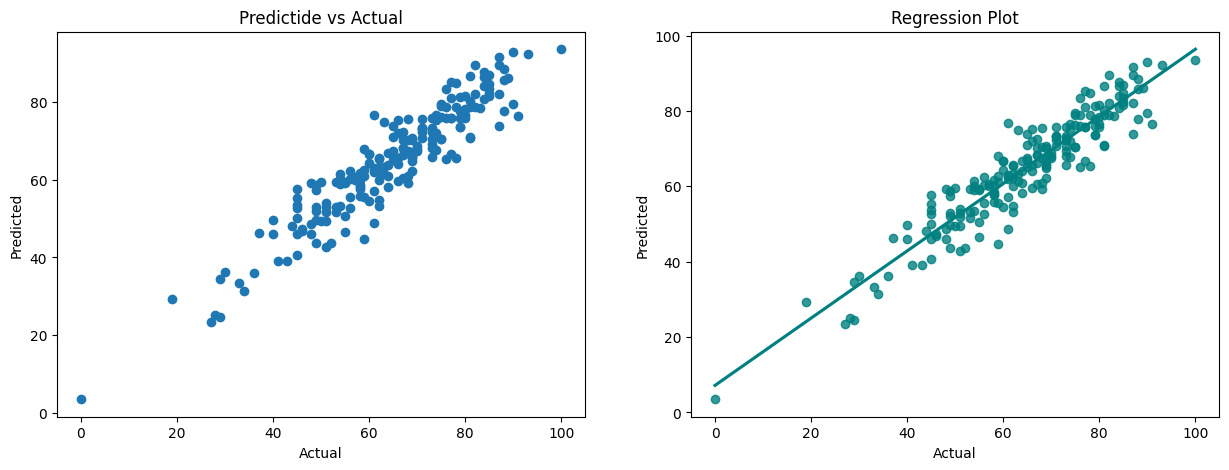

In [35]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
plt.subplot(121)
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predictide vs Actual')
plt.subplot(122)
sns.regplot(x=Y_test, y=y_pred, ci=None, color='teal')
plt.title('Regression Plot')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Difference between Actual and Predicted Values

In [37]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
